In [1]:
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import os
import joblib
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
# Function to load data and labels
def load_data_labels(data_dir):
    images = []
    labels = []

    for class_name in sorted(os.listdir(os.path.join(data_dir, 'PlantVillage'))):
        class_path = os.path.join(data_dir, 'PlantVillage', class_name)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            image = cv2.imread(image_path)
            if image is not None:
                images.append(image)
                labels.append(class_name)

    return np.array(images), np.array(labels)


In [3]:
# Function to plot class distribution
def plot_class_distribution(labels):
    plt.figure(figsize=(10, 6))
    sns.countplot(y=labels)
    plt.title('Class Distribution')
    plt.xlabel('Count')
    plt.ylabel('Class')
    plt.show()


In [4]:
def plot_sample_images(images, labels, num_samples=5, figsize=(15, 10), image_size=(4, 4)):
    classes = np.unique(labels)
    fig, axes = plt.subplots(len(classes), num_samples, figsize=figsize, gridspec_kw={'hspace': 0.5})

    for i, class_name in enumerate(classes):
        class_indices = np.where(labels == class_name)[0]
        sample_indices = np.random.choice(class_indices, num_samples, replace=False)
        for j, idx in enumerate(sample_indices):
            ax = axes[i, j]
            ax.imshow(cv2.cvtColor(images[idx], cv2.COLOR_BGR2RGB))
            ax.set_title(class_name)
            ax.axis('off')
            ax.figure.set_size_inches(image_size[0], image_size[1])
            ax.set_aspect('auto')  # Set aspect ratio to match the image's aspect ratio

    plt.tight_layout()
    plt.show()

In [5]:
def plot_image_statistics(images, num_samples=1000):
    sampled_indices = np.random.choice(images.shape[0], num_samples, replace=False)
    sampled_images = images[sampled_indices]

    image_means = np.mean(sampled_images, axis=(1, 2, 3))
    image_stds = np.std(sampled_images, axis=(1, 2, 3))
    image_mins = np.min(sampled_images, axis=(1, 2, 3))
    image_maxs = np.max(sampled_images, axis=(1, 2, 3))

    plt.figure(figsize=(12, 6))
    plt.subplot(2, 2, 1)
    plt.hist(image_means, bins=30)
    plt.title('Image Mean Distribution')
    plt.xlabel('Mean Pixel Value')
    plt.ylabel('Frequency')

    plt.subplot(2, 2, 2)
    plt.hist(image_stds, bins=30)
    plt.title('Image Standard Deviation Distribution')
    plt.xlabel('Standard Deviation')
    plt.ylabel('Frequency')

    plt.subplot(2, 2, 3)
    plt.hist(image_mins, bins=30)
    plt.title('Image Minimum Pixel Value Distribution')
    plt.xlabel('Minimum Pixel Value')
    plt.ylabel('Frequency')

    plt.subplot(2, 2, 4)
    plt.hist(image_maxs, bins=30)
    plt.title('Image Maximum Pixel Value Distribution')
    plt.xlabel('Maximum Pixel Value')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()


In [6]:
def plot_pca(images, labels, num_samples=1000):
    sampled_indices = np.random.choice(images.shape[0], num_samples, replace=False)
    sampled_images = images[sampled_indices]
    sampled_labels = labels[sampled_indices]

    flattened_images = sampled_images.reshape(sampled_images.shape[0], -1)
    pca = PCA(n_components=2)
    reduced_features = pca.fit_transform(flattened_images)

    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=reduced_features[:, 0], y=reduced_features[:, 1], hue=sampled_labels, palette='viridis')
    plt.title('PCA Visualization')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Class')
    plt.show()

In [7]:
# Function to plot confusion matrix
def plot_confusion_matrix(true_labels, predicted_labels):
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=np.unique(true_labels), yticklabels=np.unique(true_labels))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

In [8]:
data_dir = 'archive'

In [9]:
images, labels = load_data_labels(data_dir)

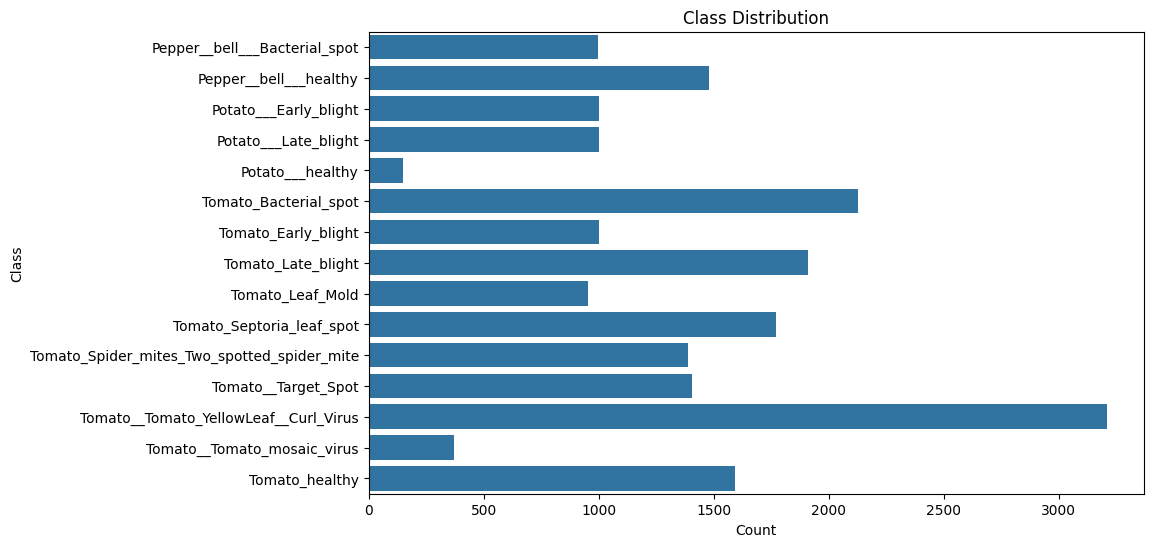

In [10]:
plot_class_distribution(labels)

C:\Users\DELL\AppData\Local\Temp\ipykernel_18300\1065390616.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


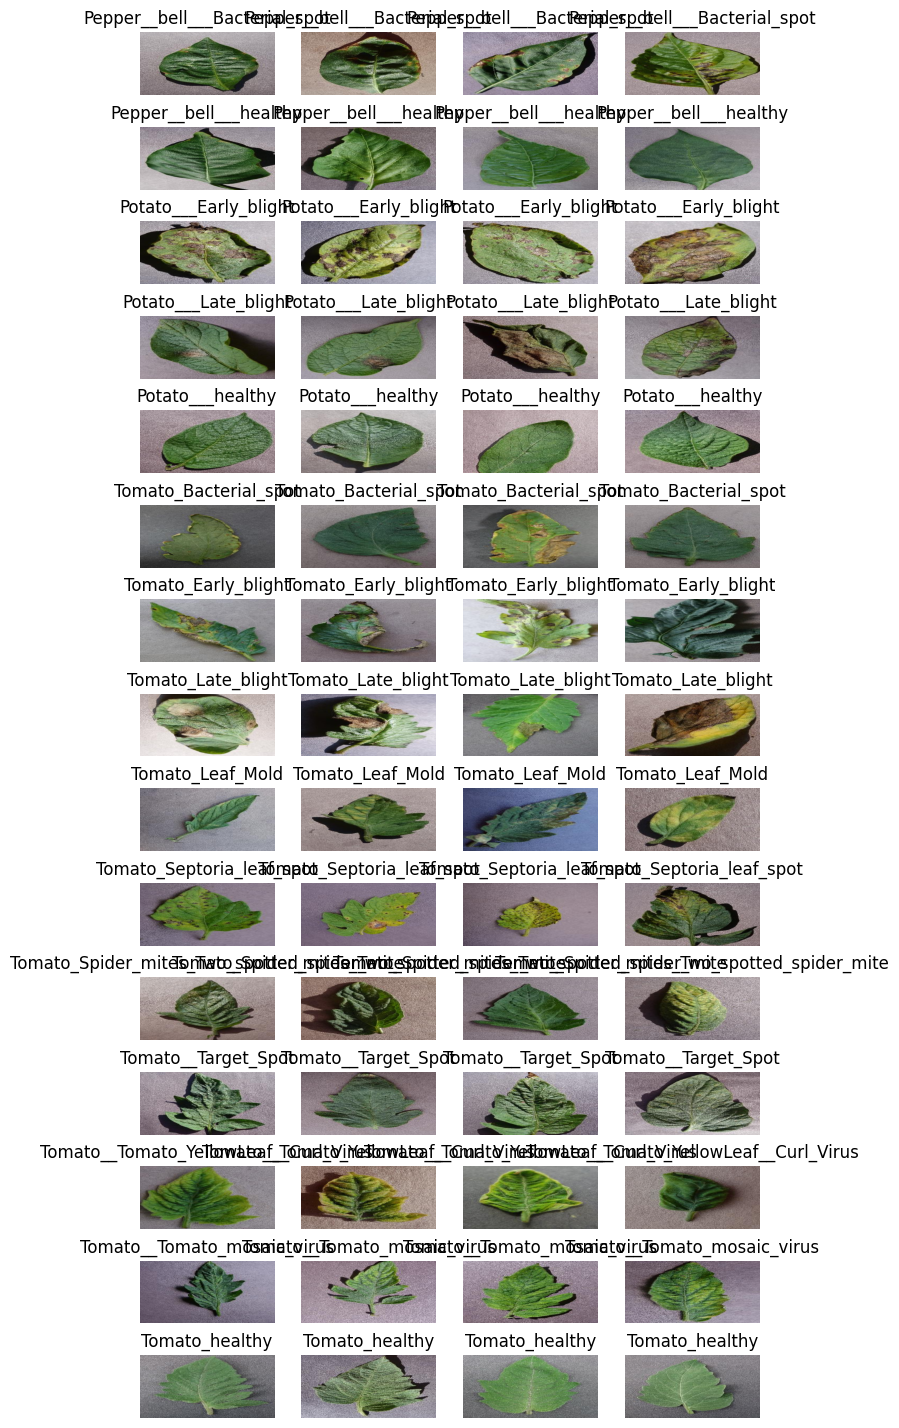

In [11]:
plot_sample_images(images, labels, num_samples=4, figsize=(15, 20), image_size=(8, 18))

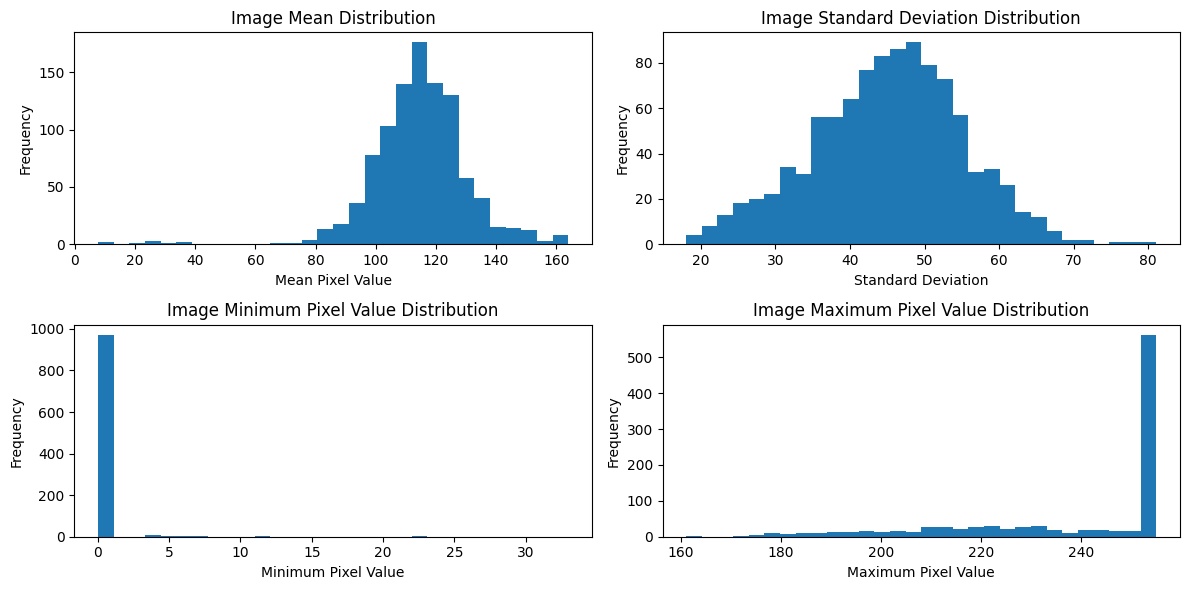

In [12]:
plot_image_statistics(images, num_samples=1000)

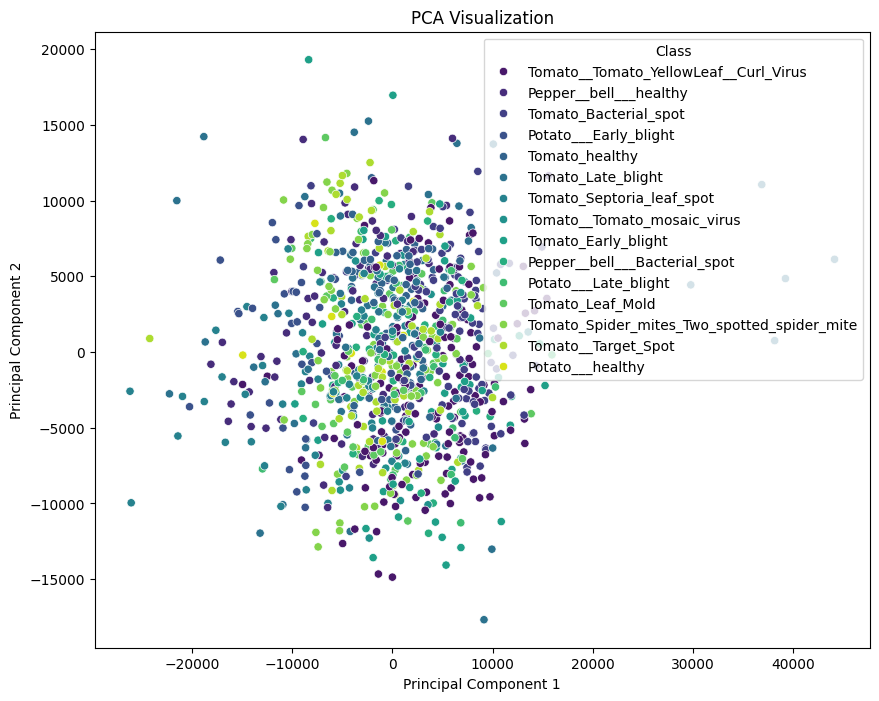

In [13]:
plot_pca(images, labels, num_samples=1000)

In [14]:
def preprocess_image(image):
    image = cv2.resize(image, (32, 32)) 
    image = image.astype('float32') / 255.0 
    return image  

In [15]:
def load_data(data_dir):
    X = []
    y = []

    for class_name in sorted(os.listdir(os.path.join(data_dir, 'PlantVillage'))):
        class_path = os.path.join(data_dir, 'PlantVillage', class_name)
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)
            image = cv2.imread(image_path)
            if image is not None:
                preprocessed_image = preprocess_image(image)
                preprocessed_image = preprocessed_image.flatten()  
                X.append(preprocessed_image)
                y.append(class_name)  

    return np.array(X), np.array(y)

In [16]:
def train_model(X_train, y_train):
    model = SVC(kernel='rbf', C=1.0, gamma='scale') 
    model.fit(X_train, y_train)  
    return model

In [17]:
def predict_disease(image_path, model):
    try:
        
        image = cv2.imread(image_path)

    
        preprocessed_image = preprocess_image(image)

        
        preprocessed_image = preprocessed_image.reshape(1, -1)

        
        prediction = model.predict(preprocessed_image)
        predicted_disease = prediction[0]  

        return predicted_disease

    except Exception as e:
        print(f"Error predicting disease for image: {image_path}")
        print(e)
        return None  

In [21]:
# Load data
X, y = load_data(data_dir)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
model = train_model(X_train, y_train)


In [27]:
# Input
file_name = input("Enter name of the file: ")

# Check if file exists
if os.path.exists(file_name):
    predicted_disease = predict_disease(file_name, model)
    
    if predicted_disease is not None:
        print("Predicted disease:", predicted_disease)
    else:
        print("An error occurred during prediction.")
else:
    print("File not found. Please enter a valid file name.")

Enter name of the file:  leaf.JPG


Predicted disease: Potato___Early_blight


In [28]:
# Input
file_name = input("Enter name of the file: ")

# Check if file exists
if os.path.exists(file_name):
    predicted_disease = predict_disease(file_name, model)
    
    if predicted_disease is not None:
        print("Predicted disease:", predicted_disease)
    else:
        print("An error occurred during prediction.")
else:
    print("File not found. Please enter a valid file name.")

Enter name of the file:  two.JPG


Predicted disease: Pepper__bell___healthy


In [19]:
y_pred = model.predict(X_test)

#accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.8058968058968059


In [20]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.70      0.73      0.72       173
                     Pepper__bell___healthy       0.84      0.87      0.86       273
                      Potato___Early_blight       0.88      0.88      0.88       221
                       Potato___Late_blight       0.77      0.75      0.76       208
                           Potato___healthy       1.00      0.10      0.19        29
                      Tomato_Bacterial_spot       0.85      0.90      0.88       459
                        Tomato_Early_blight       0.61      0.45      0.52       196
                         Tomato_Late_blight       0.76      0.75      0.76       397
                           Tomato_Leaf_Mold       0.81      0.67      0.73       214
                  Tomato_Septoria_leaf_spot       0.68      0.74      0.71       332
Tomato_Spider_mites_Two_spotted_spider_mi